# Part II - (Analysis of Loan Data from Prosper)
## by (Oni Sodiq Adesola)





## Investigation Overview


 My main focus is to determine those features that can help to decide Borrowers APR while granting loan likewise those features that affect the prosper rating of borrowers.




## Dataset Overview

The raw dataset consist of 113937 rows and 81 columns, after selecting the interested features, cleaning the quality and tidiness issues the datase reduces to 83982 rows and 14 columns. The main features of Interest are BorrowerAPR and ProsperRating

In [125]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [126]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [127]:
# Create a list of interested feature names
interested_features = ['BorrowerAPR', 'ProsperRating (Alpha)', 'Term', 'InquiriesLast6Months',
                'BankcardUtilization', 'EstimatedLoss', 'OnTimeProsperPayments', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'IncomeRange',
                'StatedMonthlyIncome', 'BorrowerState', 'LoanStatus', 'EmploymentStatus']

# Extract the interested features from the original dataframe
df = df[interested_features]


In [128]:
# data wrangling

# replacing Not employed in IncomeRange with 0
df.IncomeRange = df.IncomeRange.str.replace('Not employed', '$0')

# drop duplicate data

df = df.drop_duplicates()

# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df[key] = df[key].astype(correct_order)
    
# Create a list of columns with null values
null_columns = ['BorrowerAPR', 'ProsperRating (Alpha)']

# Filter out null values from the dataframe
for col in null_columns:
    df = df[df[col].notnull()]
    
# renaming ProsperRating (Alpha) to Prosperrating
df = df.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating'})




## Distribution of BorrowerAPR

The distribution is multimoldal and also looks roughly like a normal distribution aside the peak between 0.35 and 0.36. There are peaks around 0.09, 0.18 and 0.21 respectively. There is also a very sharp peak between 0.35 and 0.36. Also, only few listings have borrower APR greater than 0.4. 

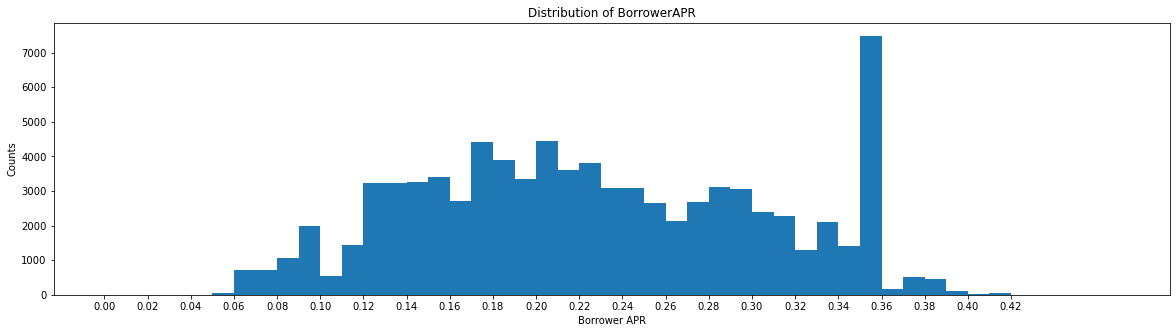

In [129]:
# Set a larger figure size for plot
plt.figure(figsize = [20, 5]) 


# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

#set a dynamic number of bins with step-size 0.01
bins = np.arange(0, df['BorrowerAPR'].max()+0.05, 0.01)

plt.hist(df['BorrowerAPR'], bins = bins, color = base_color)
plt.xticks(np.arange(0, 0.44, 0.02))
plt.title('Distribution of BorrowerAPR')
plt.ylabel('Counts')
plt.xlabel('Borrower APR');

## Distribution of ProsperRating

The distribution of prosper ratings is unimodal, with the most common rating belonging to the central grade represented (C). Listings with very high prosper ratings (AA) are the least common.

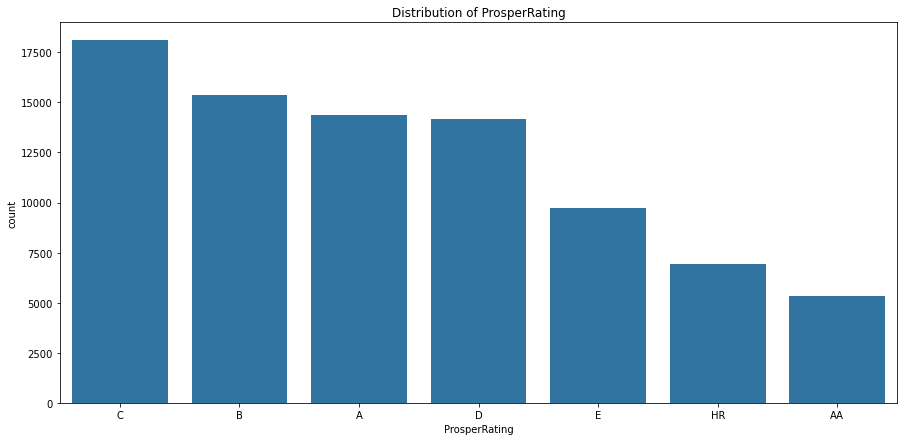

In [130]:
# Set a larger figure size for plot
plt.figure(figsize = [15, 7]) 


# Count the frequency of unique values in the `ProsperRating` column of df_clean dataframe. 
# By default, returns the decreasing order of the frequency.
rating_counts = df['ProsperRating'].value_counts()

# Get the unique values of the `ProsperRating` column, in the decreasing order of the frequency.
rating_order = rating_counts.index

base_color = sb.color_palette()[0]
sb.countplot(data= df, x='ProsperRating', color=base_color, order= rating_order)
plt.title('Distribution of ProsperRating');


## BorrowerAPR vs Other numerical variables

Plotting the correlation between numerical variables shows a very strong correlation between BorrowerAPR and EstimatedLoss. This implies that the higher the BorrowerAPR the higher their EstimatedLoss and vice-versa. There appears to be a moderate negative correlation (-0.427) between loan original amount and Borrower APR. This implies that larger loans may attract lesser annual percentage rates than smaller loans.

In [131]:
# Grouping both numerical and categorical variables

numeric_vars = ['BorrowerAPR', 'InquiriesLast6Months', 'BankcardUtilization', 'EstimatedLoss', 'OnTimeProsperPayments', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome']
categoric_vars = ['ProsperRating', 'IncomeRange', 'BorrowerState', 'LoanStatus', 'EmploymentStatus', 'Term']



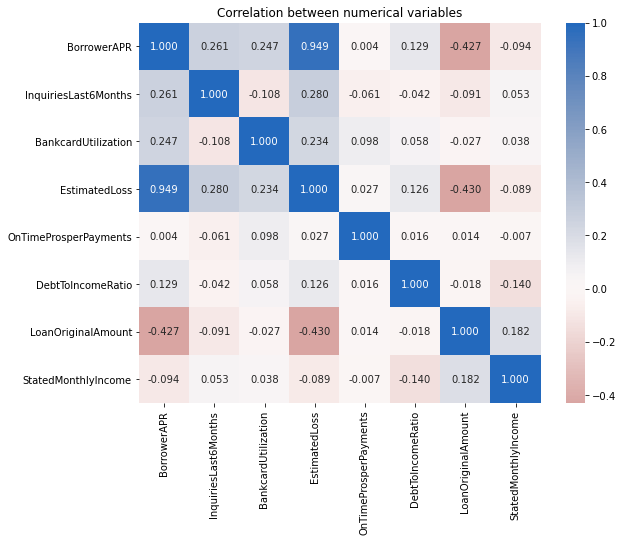

In [132]:
# correlation plot
plt.figure(figsize = [9, 7])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between numerical variables');

## BorrowerAPR vs ProsperRating and IncomeRange

There is an inverse relation with BorrowerAPR and ProsperRating, as expected BorrowerAPR for borrowers with low prosper rating is quite higher than those with high prosper rating. Similarly, BorrowerAPR reduces with increase in IncomeRange, it also depict an inverse relation between BorrowerAPR and IncomeRange, which means those with high income range tends to have smaller APR.

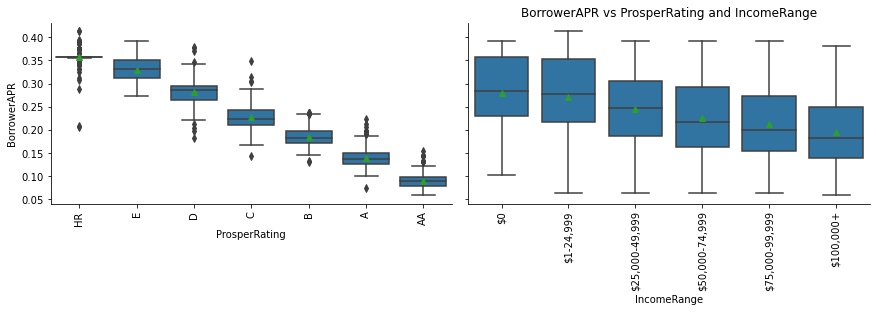

In [133]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Create a list of columns to plot on each pairgrid axis
x_cols = ['ProsperRating','IncomeRange']

df_samp = df.sample(n=4000, replace = False)


def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color, showmeans = True)



g = sb.PairGrid(data = df_samp, x_vars = x_cols, y_vars = 'BorrowerAPR',
                height = 3, aspect = 2)


for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
g.map(boxgrid)

plt.title('BorrowerAPR vs ProsperRating and IncomeRange');



## ProsperRating vs EstimatedLoss and InquiriesLast6Months

A significant impact was discovered between ProsperRating, EstimatedLoss and InquiriesLast6Months. It is easy to observe that the mean EstimatedLoss is significantly higher for risky borrowers. This makes sense because the lenders will be cautious in giving money to high risk borrowers also since borrowers who have been prompt in repaying entire loan amount on time ought to have higher ProsperRating.

Furthermore, on an average the borrowers who have made frequent inquiries to the bureau have lower prosper rating, hence are more risky. Second, we see significant outliers for every value of ProsperRating. But the variation for safe borrowers is lower than other grades. It is expected, since borrowers in excellent credit rating tend not to make several inquiries to the bureau. Next, we also observe skewness in the distribution for InquiriesLast6Months. The mean is significantly higher than median in most of the cases. This can be attributed to the presence of significant number of outliers corresponding to each ProsperRating.

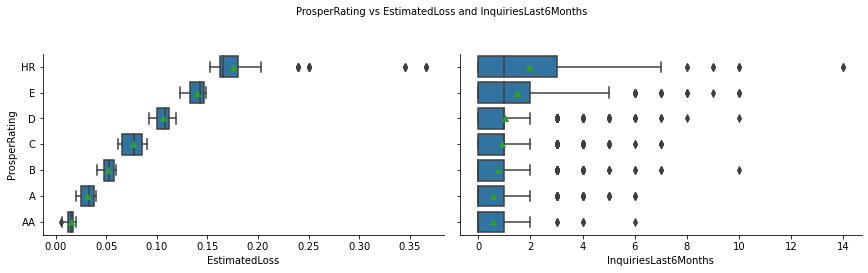

In [134]:
# plot matrix of numeric features against categorical features.


# Create a list of columns to plot on each pairgrid axis
x_cols = ['EstimatedLoss','InquiriesLast6Months']
y_cols = ['ProsperRating']

#Select some 4000 samples

df_samp = df.sample(n=4000, replace = False)


def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color, showmeans = True)


g = sb.PairGrid(data = df_samp, x_vars = x_cols, y_vars = y_cols,
                height = 3, aspect = 2)

g.map(boxgrid)
plt.text(-7, -2, 'ProsperRating vs EstimatedLoss and InquiriesLast6Months');

## Relationship between ProsperRating, LoanOriginalAmount and IncomeRange

Across every income range the average loan amount requested is lower for borrowers with low prosper rating. As expected for risky borrowers to get lower amount approved because of their low rating.

Borrowers with excellent credit rating (AA) get the highest loan amount approved. Despite their low income, borrowers with excellent credit gain trust of lenders and seem to be favored while approving loan amount.

Borrowers with high yearly incomes of 50000USD above exhibit quite consistent behavior in the requested loan amonts. There are no outliers for them. On the contrary, risky borrowers do have outliers across every Income range. One possible explanation is that these borrowers tend to overspend and hence need additional funds.

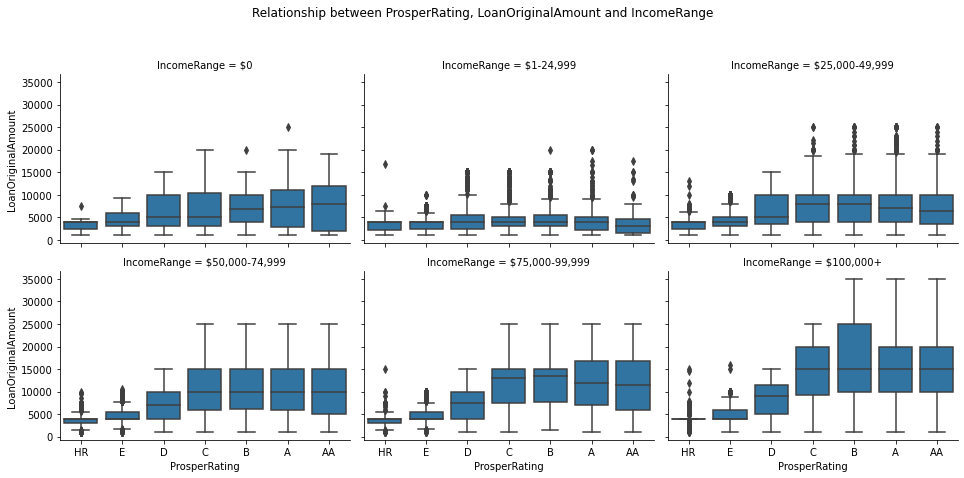

In [135]:
#Create a FacetGrid across all level of IncomeRange

g = sb.FacetGrid(data = df, col = 'IncomeRange', col_wrap = 3, height = 3, aspect = 1.5)

# Plot a boxplot
g.map(sb.boxplot,'ProsperRating', 'LoanOriginalAmount')

g.fig.suptitle('Relationship between ProsperRating, LoanOriginalAmount and IncomeRange', y = 1.1);

## Relationship between LoanOriginalAmount, ProsperRating and BorrowerAPR

Risky borrowers were able to take smaller loans with high rate, while those with higher prosper ratings enjoy higher loan amounts at lower rates. The regression line also shows the negative correlation between LoanOriginalAmount and BorrowerAPR for risky borrowers. They tend to have access to small loan. and the possitive correlation betweeen LoanOriginalAmount and BorrowerAPR for borrowers with high rating.

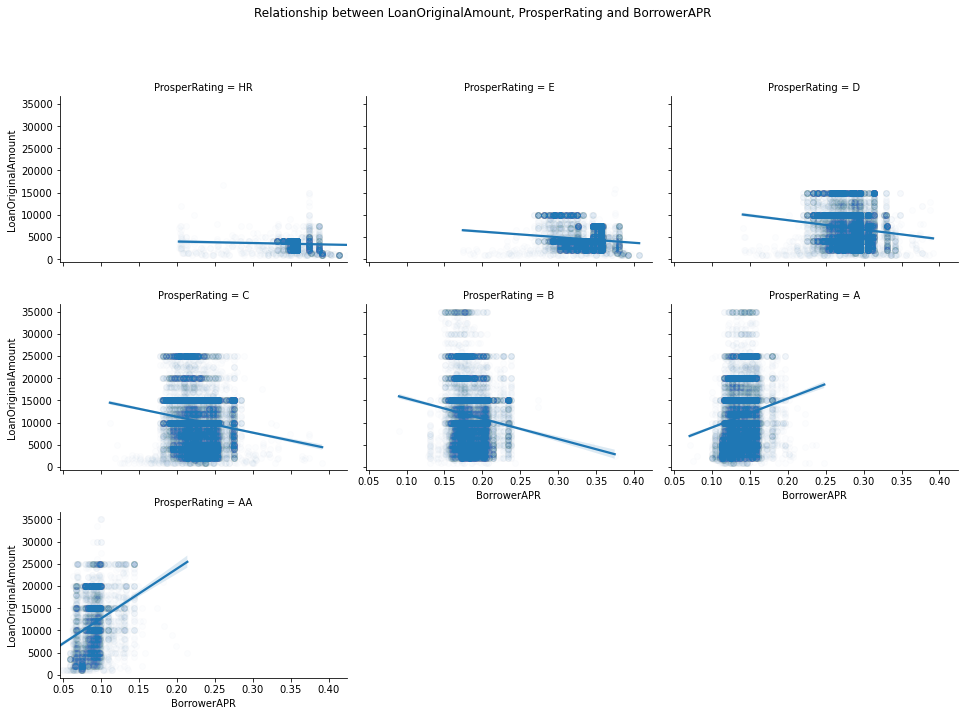

In [136]:
#create a FacetGrid across all ProsperRating

g = sb.FacetGrid(data = df, col = 'ProsperRating', col_wrap = 3, height = 3, aspect = 1.5)

#plot a regplot

g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', color=base_color, scatter_kws={'alpha': 0.01})

g.fig.suptitle('Relationship between LoanOriginalAmount, ProsperRating and BorrowerAPR', y = 1.1);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [138]:
# Use this command if you are running this file in local
!jupyter nbconvert loan_data_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook loan_data_slide.ipynb to slides
[NbConvertApp] Writing 693103 bytes to loan_data_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\hp\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\hp\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\hp\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\hp\anaconda3